# Hola Fernando!

Mi nombre es Oscar Flores y me toca revisar tu proyecto de hoy. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>


## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Hola! En la parte inicial hay un problema con las imputaciones, al parecer modifican demasiado la distribuciones de las variables donde sea imputa, si quieres imputar valores en esas columnas revisa antes las distribuciones para ver si vale la pena imputar. Te dejé comentarios acerca de esta y otras correcciones de la parte inicial. Una vez corregida la parte inicial, seguiré revisando lo demás.
    
Saludos!
</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Buen trabajo! Se observa que el cambio en la imputación mejoró el error MAE, sin embargo, no me di cuenta y el principal error está en que la fórmula utiliza un término incorrecto, corrigiendo eso debería mejorar mucho más. Por otro lado, en la parte de los modelos, debes encontrar el mejor modelo con validación cruzada y el score smape, dejé instrucciones detalladas en esa parte. Además, ese mejor modelo es el que debe ser utilizado para el test final.
    
Saludos!
</div>

## Resumen de la revisión 3 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Hola! Bien con la implementación del scorer modificado, pero aún faltan corregir algunas cosas. Principalmente los modelos que escogiste no funcionan con estos datos pues están diseñados para data discreta, te indique cuáles debes usar. Además, puse un ejemplo de como generar uno de los modelos con la metodología de validación cruzada. Dejé un par de detalles escritos en rojo para esta revisión (v3) que te pueden orientar a cómo utilizar validación cruzada. 
    
Saludos!
</div>

## Resumen de la revisión 4 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Muy bien! Ahora está todo corregido y tu proyect está aprobado.
    
Saludos!    
</div>

----

#### Introducción

La empresa Zyfra desarrolla soluciones de eficiencia para la industria pesada y requieren desarrollar un modelo para predecir la cantidad de oro final extraído del mineral en bruto de oro.

In [121]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
from joblib import dump
from matplotlib import pyplot
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [122]:
from sklearn import preprocessing as pre
from sklearn import pipeline as pip
from sklearn import compose as cmp
from sklearn import impute as imp
from sklearn import model_selection as mod
from sklearn import metrics as met
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [123]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv') 
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

#### Preprocesamiento de datos

##### Datos de entrenamiento

In [124]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [125]:
data_train.shape

(16860, 87)

In [126]:
data_train['date'] = pd.to_datetime(data_train['date'], format = '%Y-%m-%d %H:%M:%S')

In [127]:
data_train.isna().sum().sort_values(ascending=False).head(10)

rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64

In [128]:
isna_percent_train_before = data_train.isna().sum() / data_train.shape[0]

In [129]:
isna_percent_train_before[isna_percent_train_before>=0.10].sort_values(ascending=False)

rougher.output.recovery               0.152610
rougher.output.tail_ag                0.133452
rougher.output.tail_sol               0.133393
rougher.output.tail_au                0.133393
secondary_cleaner.output.tail_sol     0.117794
rougher.input.floatbank11_xanthate    0.112930
dtype: float64

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, normalmente reemplazar por la mediana es una muy buena alternativa, sin embargo, antes de imputar los datos se debe por lomenos observar su distribución, para entender qué podríamos ganar o perder al imputar por la media o mediana.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Ya se ha revisado la distribución de las 6 columnas con mayor número de datos ausentes y he determinado que es mejor eliminar los datos ausentes para evitar concentraciones en las distribuciones utilizando la mediana. A continuación muestro el resultado final de las distribuciones después de eliminar datos ausentes.  
    
</div>

In [130]:
data_train = data_train.dropna()

In [131]:
data_train.isna().sum().sort_values(ascending=False).head(10)

date                                 0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_e_air      0
rougher.state.floatbank10_d_level    0
rougher.state.floatbank10_d_air      0
rougher.state.floatbank10_c_level    0
rougher.state.floatbank10_c_air      0
rougher.state.floatbank10_b_level    0
dtype: int64

In [132]:
data_train.shape

(11017, 87)

array([[<AxesSubplot:title={'center':'rougher.output.recovery'}>]],
      dtype=object)

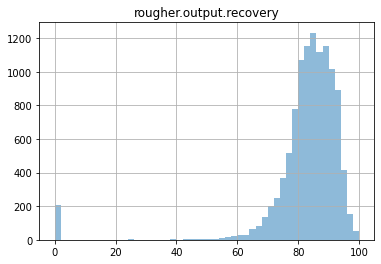

In [133]:
data_train.hist('rougher.output.recovery', bins=50,  alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.output.tail_ag'}>]],
      dtype=object)

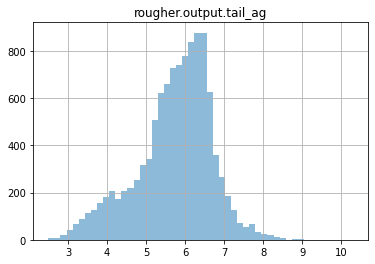

In [134]:
data_train.hist('rougher.output.tail_ag', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.output.tail_sol'}>]],
      dtype=object)

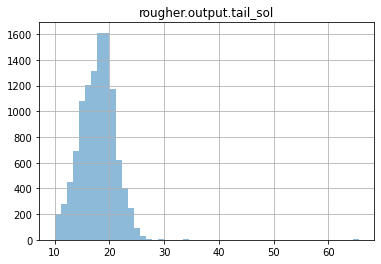

In [135]:
data_train.hist('rougher.output.tail_sol', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.output.tail_au'}>]],
      dtype=object)

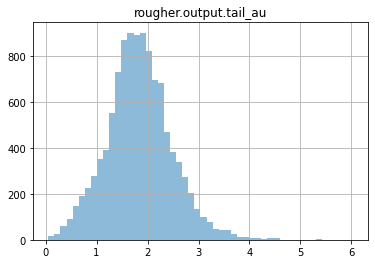

In [136]:
data_train.hist('rougher.output.tail_au', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'secondary_cleaner.output.tail_sol'}>]],
      dtype=object)

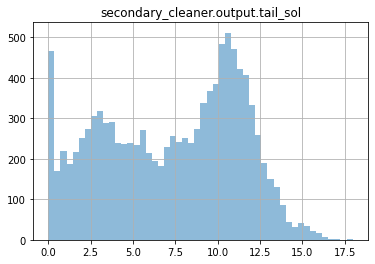

In [137]:
data_train.hist('secondary_cleaner.output.tail_sol', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.input.floatbank11_xanthate'}>]],
      dtype=object)

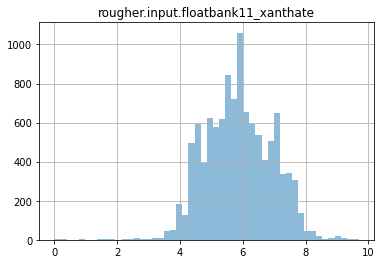

In [138]:
data_train.hist('rougher.input.floatbank11_xanthate', bins=50, alpha=0.5)

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Bien, ahora se observa que no se acumularon tantos datos entorno a un valor. Cuando se tienen datos relacionados a una serie temporal normalmente la imputación por mediana no es buena idea, sino que una imputación de datos cercanos temporalmente o en algunos casos se pueden remover los nulos.
</div>

##### Datos de prueba

In [139]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [140]:
data_test['date'] = pd.to_datetime(data_test['date'], format = '%Y-%m-%d')

In [141]:
data_test.shape

(5856, 53)

In [142]:
data_test.isna().sum().sort_values(ascending=False).head(10)

rougher.input.floatbank11_xanthate          353
primary_cleaner.input.sulfate               302
primary_cleaner.input.depressant            284
rougher.input.floatbank10_sulfate           257
primary_cleaner.input.xanthate              166
rougher.input.floatbank10_xanthate          123
rougher.input.feed_sol                       67
rougher.input.floatbank11_sulfate            55
rougher.input.feed_rate                      40
secondary_cleaner.state.floatbank3_a_air     34
dtype: int64

In [143]:
#isna_percent_test = data_test.isna().sum() / data_test.shape[0]

In [144]:
#isna_percent_test[isna_percent_test>=0.10].sort_values(ascending=False)

In [145]:
data_test = data_test.dropna()

In [146]:
data_test.shape

(5383, 53)

##### Datos completos

In [147]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [148]:
data_full['date'] = pd.to_datetime(data_full['date'], format = '%Y-%m-%d')

In [149]:
data_full.shape

(22716, 87)

In [150]:
data_full.isna().sum().sort_values(ascending=False).head(10)

rougher.output.recovery               3119
rougher.output.tail_ag                2737
rougher.output.tail_au                2736
rougher.output.tail_sol               2736
rougher.input.floatbank11_xanthate    2257
secondary_cleaner.output.tail_sol     2215
final.output.recovery                 1963
rougher.calculation.au_pb_ratio       1627
primary_cleaner.input.sulfate         1609
primary_cleaner.input.depressant      1546
dtype: int64

In [151]:
isna_percent_full = data_full.isna().sum() / data_full.shape[0]

In [152]:
isna_percent_full[isna_percent_full>=0.10].sort_values(ascending=False)

rougher.output.recovery    0.137304
rougher.output.tail_ag     0.120488
rougher.output.tail_sol    0.120444
rougher.output.tail_au     0.120444
dtype: float64

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Mismo comentario anterior, deberíamos revisar las distribuciones antes de imputar todo.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Ya se ha revisado la distribución de las 4 columnas con mayor número de datos ausentes y he determinado que es mejor eliminar los datos ausentes para evitar concentraciones en las distribuciones utilizando la mediana. A continuación muestro el resultado final de las distribuciones después de eliminar datos ausentes.  
    
</div>

In [153]:
data_full = data_full.dropna()

In [154]:
data_full.isna().sum().sort_values(ascending=False).head(10)

date                                 0
rougher.state.floatbank10_b_air      0
rougher.state.floatbank10_f_air      0
rougher.state.floatbank10_e_level    0
rougher.state.floatbank10_e_air      0
rougher.state.floatbank10_d_level    0
rougher.state.floatbank10_d_air      0
rougher.state.floatbank10_c_level    0
rougher.state.floatbank10_c_air      0
rougher.state.floatbank10_b_level    0
dtype: int64

array([[<AxesSubplot:title={'center':'rougher.output.recovery'}>]],
      dtype=object)

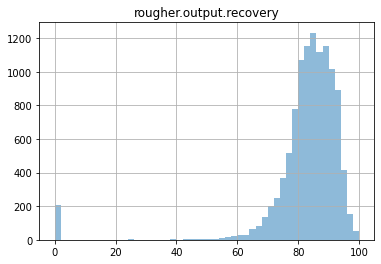

In [155]:
data_train.hist('rougher.output.recovery', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.output.tail_ag'}>]],
      dtype=object)

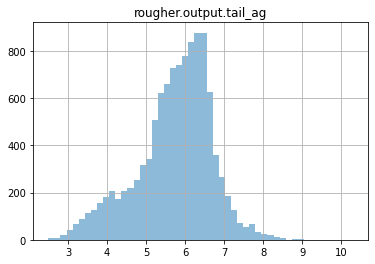

In [156]:
data_train.hist('rougher.output.tail_ag', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.output.tail_sol'}>]],
      dtype=object)

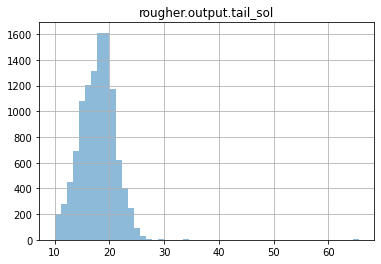

In [157]:
data_train.hist('rougher.output.tail_sol', bins=50, alpha=0.5)

array([[<AxesSubplot:title={'center':'rougher.output.tail_au'}>]],
      dtype=object)

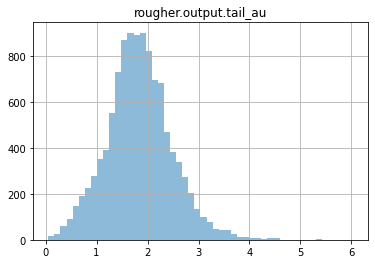

In [158]:
data_train.hist('rougher.output.tail_au', bins=50, alpha=0.5)

In [159]:
data_full.shape

(16094, 87)

##### Cálculo de la recuperación

In [160]:
R_target = data_train['rougher.output.recovery']

In [161]:
C = data_train['rougher.output.concentrate_au'] #/ data_train['final.output.concentrate_au']
F = data_train['rougher.input.feed_au'] #/ data_train['rougher.output.concentrate_au']
T = data_train['rougher.output.tail_au'] #/ data_train['final.output.concentrate_au']

In [162]:
A = C * (F-T)

In [163]:
B = F* (C-T)

In [164]:
R_predicted = A/B * 100

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Ok, la fórmula está bien, aunque se podría simplificar, no es necesario que ninguno esté dividido por final.output.concentrate_au
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
He eliminado el denominador de las tres variables que conforman la variable de predicción como se ha solicitado. 
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

En la revisión anterior no me di cuenta, pero el tercer término es incorrecto, debe ser rougher.output.tail_au, por esto es que la fórmula no genera un MAE correcto.
</div>

In [165]:
R_target = R_target.reset_index(drop=True)
R_predicted = R_predicted.reset_index(drop=True)

In [166]:
R_target.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

In [167]:
R_predicted.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

In [168]:
def mae(target, prediction):
    error = 0
    for i in range(target.shape[0]):
        error += abs(target[i] - prediction[i])
    return error / target.shape[0]

In [169]:
round(mae(R_target, R_predicted),2)

0.0

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Esto muestra que la imputación anterior, al usar la mediana, no fue correcta, el error es demasiado grande. Debes revisar esa parte, tal vez lo mejor sea eliminar los valores que tienen nulos. Te recomiendo aplicar la fórmula sobre un dataframe que no tenga nulos en esas columnas, la idea es comprobar que los datos siguen la fórmula (se asume que es correcta, debería dar similar)
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
El cálculo de error se ha reducido de 12.49 a 10.98 con la eliminación de datos ausentes. La fórmula se aplica sobre dataframes sin valores nulos.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, esto mejora el cálculo, pero la fórmula utilizada se debe arreglar como indiqué más arriba. Con eso corregido el error será mucho menor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Muy bien! Ahora se observa que el mae es practicamente cero.
</div>

#### Análisis de los datos

##### Distribución de tamaño de partículas por etapas

In [170]:
IQR_ag_1 = data_train['rougher.input.feed_ag'].quantile(0.75) - data_train['rougher.input.feed_ag'].quantile(0.25)
LIQR_ag_1 = data_train['rougher.input.feed_ag'].quantile(0.25)-1.5*IQR_ag_1
UIQR_ag_1 = data_train['rougher.input.feed_ag'].quantile(0.75)+1.5*IQR_ag_1

In [171]:
IQR_ag_2 = data_train['rougher.output.concentrate_ag'].quantile(0.75) - data_train['rougher.output.concentrate_ag'].quantile(0.25)
LIQR_ag_2 = data_train['rougher.output.concentrate_ag'].quantile(0.25)-1.5*IQR_ag_2
UIQR_ag_2 = data_train['rougher.output.concentrate_ag'].quantile(0.75)+1.5*IQR_ag_2

In [172]:
IQR_ag_3 = data_train['primary_cleaner.output.concentrate_ag'].quantile(0.75) - data_train['primary_cleaner.output.concentrate_ag'].quantile(0.25)
LIQR_ag_3 = data_train['primary_cleaner.output.concentrate_ag'].quantile(0.25)-1.5*IQR_ag_3
UIQR_ag_3 = data_train['primary_cleaner.output.concentrate_ag'].quantile(0.75)+1.5*IQR_ag_3

In [173]:
IQR_ag_4 = data_train['final.output.concentrate_ag'].quantile(0.75) - data_train['final.output.concentrate_ag'].quantile(0.25)
LIQR_ag_4 = data_train['final.output.concentrate_ag'].quantile(0.25)-1.5*IQR_ag_4
UIQR_ag_4 = data_train['final.output.concentrate_ag'].quantile(0.75)+1.5*IQR_ag_4

In [174]:
df_train = pd.DataFrame()
df_train['rougher_input_feed_ag'] = data_train['rougher.input.feed_ag']
df_train['rougher_output_concentrate_ag'] = data_train['rougher.output.concentrate_ag']
df_train['primary_cleaner_output_concentrate_ag'] = data_train['primary_cleaner.output.concentrate_ag']
df_train['final_output_concentrate_ag'] = data_train['final.output.concentrate_ag']

In [175]:
df_train = df_train.query('rougher_input_feed_ag > @LIQR_ag_1 and rougher_input_feed_ag < @UIQR_ag_1 and rougher_output_concentrate_ag > @LIQR_ag_2 and rougher_output_concentrate_ag < @UIQR_ag_2 and primary_cleaner_output_concentrate_ag > @LIQR_ag_3 and primary_cleaner_output_concentrate_ag < @UIQR_ag_3 and final_output_concentrate_ag > @LIQR_ag_4 and final_output_concentrate_ag < @UIQR_ag_4')
df_train = df_train.reset_index()

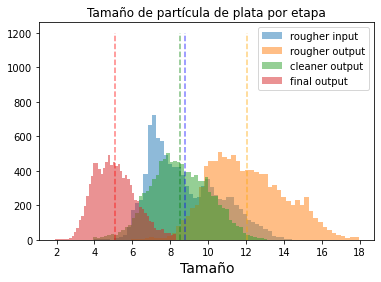

In [176]:
plt.hist(df_train['rougher_input_feed_ag'], bins=50, alpha=0.5, label="rougher input")
plt.hist(df_train['rougher_output_concentrate_ag'], bins=50, alpha=0.5, label="rougher output")
plt.hist(df_train['primary_cleaner_output_concentrate_ag'], bins=50, alpha=0.5, label="cleaner output")
plt.hist(df_train['final_output_concentrate_ag'], bins=50, alpha=0.5, label="final output")

plt.vlines(x=[df_train['rougher_input_feed_ag'].mean()], ymin=0, ymax=1200, colors='blue', ls='--', alpha=0.5)
plt.vlines(x=[df_train['rougher_output_concentrate_ag'].mean()], ymin=0, ymax=1200, colors='orange', ls='--', alpha=0.5)
plt.vlines(x=[df_train['primary_cleaner_output_concentrate_ag'].mean()], ymin=0, ymax=1200, colors='green', ls='--', alpha=0.5)
plt.vlines(x=[df_train['final_output_concentrate_ag'].mean()], ymin=0, ymax=1200, colors='red', ls='--', alpha=0.5)
              
plt.xlabel("Tamaño", size=14)
plt.title("Tamaño de partícula de plata por etapa")
plt.legend(loc='upper right')

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Correcto, vemos como la plata en general disminuye su concentración a partir de rougher
</div>

In [177]:
print(df_train['rougher_input_feed_ag'].mean())
print(df_train['rougher_output_concentrate_ag'].mean())
print(df_train['primary_cleaner_output_concentrate_ag'].mean())
print(df_train['final_output_concentrate_ag'].mean())

8.759510999274974
12.035316491435163
8.508888440781686
5.069670850023162


In [178]:
IQR_pb_1 = data_train['rougher.input.feed_pb'].quantile(0.75) - data_train['rougher.input.feed_pb'].quantile(0.25)
LIQR_pb_1 = data_train['rougher.input.feed_pb'].quantile(0.25)-1.5*IQR_pb_1
UIQR_pb_1 = data_train['rougher.input.feed_pb'].quantile(0.75)+1.5*IQR_pb_1

In [179]:
IQR_pb_2 = data_train['rougher.output.concentrate_pb'].quantile(0.75) - data_train['rougher.output.concentrate_pb'].quantile(0.25)
LIQR_pb_2 = data_train['rougher.output.concentrate_pb'].quantile(0.25)-1.5*IQR_pb_2
UIQR_pb_2 = data_train['rougher.output.concentrate_pb'].quantile(0.75)+1.5*IQR_pb_2

In [180]:
IQR_pb_3 = data_train['primary_cleaner.output.concentrate_pb'].quantile(0.75) - data_train['primary_cleaner.output.concentrate_pb'].quantile(0.25)
LIQR_pb_3 = data_train['primary_cleaner.output.concentrate_pb'].quantile(0.25)-1.5*IQR_pb_3
UIQR_pb_3 = data_train['primary_cleaner.output.concentrate_pb'].quantile(0.75)+1.5*IQR_pb_3

In [181]:
IQR_pb_4 = data_train['final.output.concentrate_pb'].quantile(0.75) - data_train['final.output.concentrate_pb'].quantile(0.25)
LIQR_pb_4 = data_train['final.output.concentrate_pb'].quantile(0.25)-1.5*IQR_pb_4
UIQR_pb_4 = data_train['final.output.concentrate_pb'].quantile(0.75)+1.5*IQR_pb_4

In [182]:
df_train = pd.DataFrame()
df_train['rougher_input_feed_pb'] = data_train['rougher.input.feed_pb']
df_train['rougher_output_concentrate_pb'] = data_train['rougher.output.concentrate_pb']
df_train['primary_cleaner_output_concentrate_pb'] = data_train['primary_cleaner.output.concentrate_pb']
df_train['final_output_concentrate_pb'] = data_train['final.output.concentrate_pb']

In [183]:
df_train = df_train.query('rougher_input_feed_pb > @LIQR_pb_1 and rougher_input_feed_pb < @UIQR_pb_1 and rougher_output_concentrate_pb > @LIQR_pb_2 and rougher_output_concentrate_pb < @UIQR_pb_2 and primary_cleaner_output_concentrate_pb > @LIQR_pb_3 and primary_cleaner_output_concentrate_pb < @UIQR_pb_3 and final_output_concentrate_pb > @LIQR_pb_4 and final_output_concentrate_pb < @UIQR_pb_4')
df_train = df_train.reset_index()

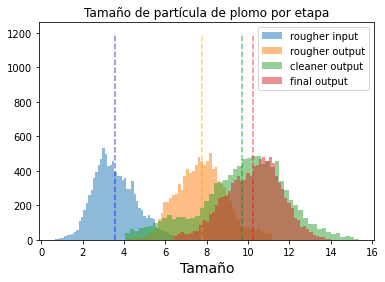

In [184]:
plt.hist(df_train['rougher_input_feed_pb'], bins=50, alpha=0.5, label="rougher input")
plt.hist(df_train['rougher_output_concentrate_pb'], bins=50, alpha=0.5, label="rougher output")
plt.hist(df_train['primary_cleaner_output_concentrate_pb'], bins=50, alpha=0.5, label="cleaner output")
plt.hist(df_train['final_output_concentrate_pb'], bins=50, alpha=0.5, label="final output")

plt.vlines(x=[df_train['rougher_input_feed_pb'].mean()], ymin=0, ymax=1200, colors='blue', ls='--', alpha=0.5)
plt.vlines(x=[df_train['rougher_output_concentrate_pb'].mean()], ymin=0, ymax=1200, colors='orange', ls='--', alpha=0.5)
plt.vlines(x=[df_train['primary_cleaner_output_concentrate_pb'].mean()], ymin=0, ymax=1200, colors='green', ls='--', alpha=0.5)
plt.vlines(x=[df_train['final_output_concentrate_pb'].mean()], ymin=0, ymax=1200, colors='red', ls='--', alpha=0.5)

plt.xlabel("Tamaño", size=14)
plt.title("Tamaño de partícula de plomo por etapa")
plt.legend(loc='upper right')

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, se observa como el plomo aumenta levemente su concentración luego de rougher output.
</div>

In [185]:
print(df_train['rougher_input_feed_pb'].mean())
print(df_train['rougher_output_concentrate_pb'].mean())
print(df_train['primary_cleaner_output_concentrate_pb'].mean())
print(df_train['final_output_concentrate_pb'].mean())

3.550692818787707
7.759087196653942
9.718740351508727
10.255028442977252


In [186]:
IQR_au_1 = data_train['rougher.input.feed_au'].quantile(0.75) - data_train['rougher.input.feed_au'].quantile(0.25)
LIQR_au_1 = data_train['rougher.input.feed_au'].quantile(0.25)-1.5*IQR_au_1
UIQR_au_1 = data_train['rougher.input.feed_au'].quantile(0.75)+1.5*IQR_au_1

In [187]:
IQR_au_2 = data_train['rougher.output.concentrate_au'].quantile(0.75) - data_train['rougher.output.concentrate_au'].quantile(0.25)
LIQR_au_2 = data_train['rougher.output.concentrate_au'].quantile(0.25)-1.5*IQR_au_2
UIQR_au_2 = data_train['rougher.output.concentrate_au'].quantile(0.75)+1.5*IQR_au_2

In [188]:
IQR_au_3 = data_train['primary_cleaner.output.concentrate_au'].quantile(0.75) - data_train['primary_cleaner.output.concentrate_au'].quantile(0.25)
LIQR_au_3 = data_train['primary_cleaner.output.concentrate_au'].quantile(0.25)-1.5*IQR_au_3
UIQR_au_3 = data_train['primary_cleaner.output.concentrate_au'].quantile(0.75)+1.5*IQR_au_3

In [189]:
IQR_au_4 = data_train['final.output.concentrate_au'].quantile(0.75) - data_train['final.output.concentrate_au'].quantile(0.25)
LIQR_au_4 = data_train['final.output.concentrate_au'].quantile(0.25)-1.5*IQR_au_4
UIQR_au_4 = data_train['final.output.concentrate_au'].quantile(0.75)+1.5*IQR_au_4

In [190]:
df_train = pd.DataFrame()
df_train['rougher_input_feed_au'] = data_train['rougher.input.feed_au']
df_train['rougher_output_concentrate_au'] = data_train['rougher.output.concentrate_au']
df_train['primary_cleaner_output_concentrate_au'] = data_train['primary_cleaner.output.concentrate_au']
df_train['final_output_concentrate_au'] = data_train['final.output.concentrate_au']

In [191]:
df_train = df_train.query('rougher_input_feed_au > @LIQR_au_1 and rougher_input_feed_au < @UIQR_au_1 and rougher_output_concentrate_au > @LIQR_au_2 and rougher_output_concentrate_au < @UIQR_au_2 and primary_cleaner_output_concentrate_au > @LIQR_au_3 and primary_cleaner_output_concentrate_au < @UIQR_au_3 and final_output_concentrate_au > @LIQR_au_4 and final_output_concentrate_au < @UIQR_au_4')
df_train = df_train.reset_index()

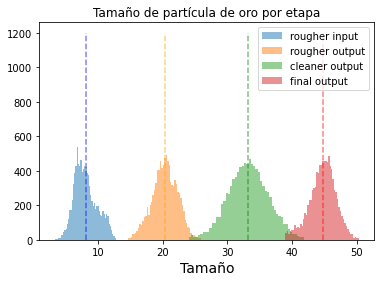

In [192]:
plt.hist(df_train['rougher_input_feed_au'], bins=50, alpha=0.5, label="rougher input")
plt.hist(df_train['rougher_output_concentrate_au'], bins=50, alpha=0.5, label="rougher output")
plt.hist(df_train['primary_cleaner_output_concentrate_au'], bins=50, alpha=0.5, label="cleaner output")
plt.hist(df_train['final_output_concentrate_au'], bins=50, alpha=0.5, label="final output")

plt.vlines(x=[df_train['rougher_input_feed_au'].mean()], ymin=0, ymax=1200, colors='blue', ls='--', alpha=0.5)
plt.vlines(x=[df_train['rougher_output_concentrate_au'].mean()], ymin=0, ymax=1200, colors='orange', ls='--', alpha=0.5)
plt.vlines(x=[df_train['primary_cleaner_output_concentrate_au'].mean()], ymin=0, ymax=1200, colors='green', ls='--', alpha=0.5)
plt.vlines(x=[df_train['final_output_concentrate_au'].mean()], ymin=0, ymax=1200, colors='red', ls='--', alpha=0.5)

plt.xlabel("Tamaño", size=14)
plt.title("Tamaño de partícula de oro por etapa")
plt.legend(loc='upper right')

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien, el oro aumenta fuertemente su concentración en todas las etapas.
</div>

In [193]:
print(df_train['rougher_input_feed_au'].mean())
print(df_train['rougher_output_concentrate_au'].mean())
print(df_train['primary_cleaner_output_concentrate_au'].mean())
print(df_train['final_output_concentrate_au'].mean())

8.119180907505722
20.35522693585734
33.234769277109535
44.75561883513264


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Para estos gráficos te recomiendo utilizar histogramas. Los boxplots muestran la existencia de outliers pero no denotan la cantidad de estos, no se puede saber fácilmente si la cantidad de outliers es significativa o no. De haber outliers, debes eliminarlos.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Se han cambiado los gráficos por histogramas y se han eliminado todos os outliers utilizando las fórmulas de IQR para cada partícula.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Excelente! Los gráficos muestran claramente como la concentración de cada metal aumenta o disminuye según la etapa a la que pasan.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

En esta parte debes mostrar cómo cambia la concentración de cada material en cada etapa. Idealmente en un gráfico para cada material muestra la distribución de la concentración en el input, la flotación, la primera purificación y el final.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
La concentración de los materiales en cada etapa ya se ha incluído en los histogramas de la sección anterior, por lo que esta sección ya no es necesaria.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Corregido
</div>

##### Distribución de tamaño de partícula en la alimentación

In [194]:
rougher_ag_input_train = data_train.pivot_table(index = 'date', values ='rougher.input.feed_ag')
rougher_ag_input_test = data_test.pivot_table(index = 'date', values ='rougher.input.feed_ag')

In [195]:
rougher_au_input_train = data_train.pivot_table(index = 'date', values ='rougher.input.feed_au')
rougher_au_input_test = data_test.pivot_table(index = 'date', values ='rougher.input.feed_au')

In [196]:
rougher_pb_input_train = data_train.pivot_table(index = 'date', values ='rougher.input.feed_pb')
rougher_pb_input_test = data_test.pivot_table(index = 'date', values ='rougher.input.feed_pb')

###### Distribución de tamaño para plata

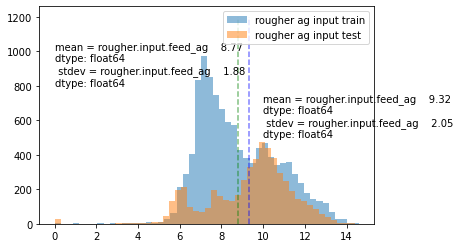

In [197]:
plt.hist(rougher_ag_input_train, bins=50, alpha=0.5, label="rougher ag input train")
plt.hist(rougher_ag_input_test , bins=50, alpha=0.5, label="rougher ag input test")
plt.vlines(x=[rougher_ag_input_train.mean()], ymin=0, ymax=1200, colors='green', ls='--', alpha=0.5)
plt.vlines(x=[rougher_ag_input_test.mean()], ymin=0, ymax=1200, colors='blue', ls='--', alpha=0.5)
plt.text(0,800, s = 'mean = {0} \n stdev = {1}'.format(round(rougher_ag_input_train.mean(), 2), round(np.std(rougher_ag_input_train),2)))
plt.text(10,500, s = 'mean = {0} \n stdev = {1}'.format(round(rougher_ag_input_test.mean(), 2), round(np.std(rougher_ag_input_test),2)))
plt.legend(loc='upper right')

###### Distribución de tamaño para oro

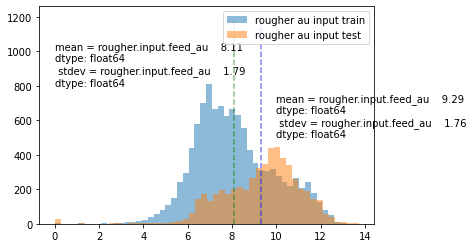

In [198]:
plt.hist(rougher_au_input_train, bins=50, alpha=0.5, label="rougher au input train")
plt.hist(rougher_au_input_test , bins=50, alpha=0.5, label="rougher au input test")
plt.vlines(x=[rougher_au_input_train.mean()], ymin=0, ymax=1200, colors='green', ls='--', alpha=0.5)
plt.vlines(x=[rougher_au_input_test.mean()], ymin=0, ymax=1200, colors='blue', ls='--', alpha=0.5)
plt.text(0,800, s = 'mean = {0} \n stdev = {1}'.format(round(rougher_au_input_train.mean(), 2), round(np.std(rougher_au_input_train),2)))
plt.text(10,500, s = 'mean = {0} \n stdev = {1}'.format(round(rougher_au_input_test.mean(), 2), round(np.std(rougher_au_input_test),2)))
plt.legend(loc='upper right')

###### Distribución de tamaño para plomo

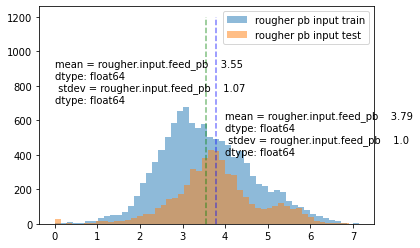

In [382]:
plt.hist(rougher_pb_input_train, bins=50, alpha=0.5, label="rougher pb input train")
plt.hist(rougher_pb_input_test , bins=50, alpha=0.5, label="rougher pb input test")
plt.vlines(x=[rougher_pb_input_train.mean()], ymin=0, ymax=1200, colors='green', ls='--', alpha=0.5)
plt.vlines(x=[rougher_pb_input_test.mean()], ymin=0, ymax=1200, colors='blue', ls='--', alpha=0.5)
plt.text(0,700, s = 'mean = {0} \n stdev = {1}'.format(round(rougher_pb_input_train.mean(), 2), round(np.std(rougher_pb_input_train),2)))
plt.text(4,400, s = 'mean = {0} \n stdev = {1}'.format(round(rougher_pb_input_test.mean(), 2), round(np.std(rougher_pb_input_test),2)))
plt.legend(loc='upper right')

- Para la partícula de plata tenemos distribuciones muy desiguales en los dataframe de entrenamiento y prueba con medias de 8.77 y 9.32 y desviación estándar de 1.88 y 2.05 respectivamente.
- Para la partícula de oro tenemos distribuciones muy desiguales en los dataframe de entrenamiento y prueba con medias de 8.11 y 9.29 y desviación estándar de 1.79 y 1.76 respectivamente.
- Para la partícula de plomo tenemos distribuciones muy desiguales en los dataframe de entrenamiento y prueba con medias de 3.55 y 3.79 y desviación estándar de 1.07 y 1.0 respectivamente.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Los gráficos están muy bien, pero falta alguna conclusión al respecto.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Se ha agregado una sección markdown con conclusiones para cada caso como se solicitó.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Muy bien! Esto significa entonces que las diferencias parecen ser significativas
</div>

#### Construcción del modelo

##### Evaluación de modelos predictivos

###### Métrica de evaluación de los modelos 

In [386]:
def sMAPE(target, prediction):
    sMAPE = (abs(target - prediction)/ (abs(target) + abs(prediction))/2).mean() * 100
    return sMAPE

###### Entrenamiento para rougher output recovery

In [383]:
data_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [384]:
target_r = data_train['rougher.output.recovery']
features_r = data_train.drop(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', #'rougher.input.feed_ag',
       #'rougher.input.feed_pb', 'rougher.input.feed_rate',
       #'rougher.input.feed_size', 'rougher.input.feed_sol',
       #'rougher.input.feed_au', 
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'],axis=1)

In [385]:
features_r.columns

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au'],
      dtype='object')

###### Validación cruzada para rougher output recovery

In [387]:
X_valid_r, X_train_r, Y_valid_r, Y_train_r = train_test_split(features_r, target_r, test_size=0.25, random_state=12345)

In [388]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): 
    rmodel = RandomForestRegressor(random_state=54321, max_depth=i, n_estimators=30)
    rsmape = cross_val_score(rmodel, X_train_r, Y_train_r.to_numpy(), scoring=custom_scorer, cv=5)
    rsmape_mean = rsmape.mean() 
    print(f'Media sMAPE: {rsmape_mean}, max_depth = {i}')

Media sMAPE: 2.368542781867162, max_depth = 1
Media sMAPE: 2.2957337946821976, max_depth = 2
Media sMAPE: 2.309484432883967, max_depth = 3
Media sMAPE: 2.2786145219834126, max_depth = 4
Media sMAPE: 2.2768175229390457, max_depth = 5
Media sMAPE: 2.2732016384779925, max_depth = 6
Media sMAPE: 2.269750506638436, max_depth = 7
Media sMAPE: 2.261505996882529, max_depth = 8
Media sMAPE: 2.2680699056559432, max_depth = 9
Media sMAPE: 2.270974468492681, max_depth = 10


In [389]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): # Variamos el rango de profundidad
    rmodel = DecisionTreeRegressor(random_state=54321, max_depth=i, min_samples_leaf=50)
    rsmape = cross_val_score(rmodel, X_train_r, Y_train_r.to_numpy(), scoring=custom_scorer, cv=5)
    rsmape_mean = rsmape.mean() # La media de los scores de cv es una estimación de la media del modelo
    print(f'Media sMAPE: {rsmape_mean}, max_depth = {i}')

Media sMAPE: 2.3873215230524583, max_depth = 1
Media sMAPE: 2.321106075559987, max_depth = 2
Media sMAPE: 2.3179369258665696, max_depth = 3
Media sMAPE: 2.3482863892586545, max_depth = 4
Media sMAPE: 2.333575309210004, max_depth = 5
Media sMAPE: 2.341694812261598, max_depth = 6
Media sMAPE: 2.33825281027822, max_depth = 7
Media sMAPE: 2.3544281469403074, max_depth = 8
Media sMAPE: 2.3531742008225187, max_depth = 9
Media sMAPE: 2.351270628608021, max_depth = 10


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Respecto a la función hay que hacerla más simple: Crea el custom_scorer y luego calcula el score con cross_val_score usando features y target de train. Debes iterar varias veces cambiando los parámetros, para cada combinación de parámetros ejecutas esta función. Una forma de hacer esto es así:
    
    custom_scorer = make_scorer(sMAPE)
    for i in range(1, 11): # Variamos el rango de profundidad
        rf_model = RandomForestRegressor(random_state=54321, max_depth=i, n_estimators=30)
        rf_smape = cross_val_score(rf_model, features, target.to_numpy(), scoring=custom_scorer, cv=5)
        smape_mean = rf_smape.mean() # La media de los scores de cv es una estimación de la media del modelo
        print(f'Media sMAPE: {smape_mean}, max_depth = {i}')
    
Luego de correr estas iteraciones, hay que escoger el mejor modelo, y luego con este puedes proceder a predecir con el test y comparar con el real.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
He modificado mi función para calcular sMAPE medio de dos modelos modulando los hiperparámetros de profundidad. La validación cruzada ya se ha corregido para utilizar los datos de entrenamiento. La selección del mejor modelo es aquel que tenga el error más bajo.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Debes realizar la validación cruzada con la función de score smape. Para esto, debes crear un objeto de tipo scorer con `make_scorer` al cual le pasas la función de smape, luego este objeto lo utilizas en el argumento `scoring` de `cross_val_score`
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Se ha agregado la llamada a sMAPE_r a través del objeto make_scorer como se recomendó y se modificó la fórmula de sMAPE para obtener los resultados después de indagar bastante con problemas relacionados al uso de for dentro de la función original.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Muy bien, ahora se utiliza la métrica correcta. Falta solamente aplicar el procedimiento correcto para encontrar el mejor modelo y luego de encontrarlo, testearlo con la data de test.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Muy bien, ahora sí esta correcto incluido los modelos
</div>

###### Entrenamiento para final output recovery

In [390]:
target_f = data_train['final.output.recovery']
features_f = data_train.drop(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       #'primary_cleaner.output.concentrate_ag',
       #'primary_cleaner.output.concentrate_pb',
       #'primary_cleaner.output.concentrate_sol',
       #'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'],axis=1)

In [391]:
features_f.columns

Index(['primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au'],
      dtype='object')

###### Validación cruzada para final output recovery

In [392]:
X_valid_f, X_train_f, Y_valid_f, Y_train_f = train_test_split(features_f, target_f, test_size=0.25, random_state=12345)

In [393]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): # Variamos el rango de profundidad
    fmodel = RandomForestRegressor(random_state=54321, max_depth=i, n_estimators=30)
    fsmape = cross_val_score(fmodel, X_train_f, Y_train_f.to_numpy(), scoring=custom_scorer, cv=5)
    fsmape_mean = fsmape.mean() # La media de los scores de cv es una estimación de la media del modelo
    print(f'Media sMAPE: {fsmape_mean}, max_depth = {i}')

Media sMAPE: 2.184101351850182, max_depth = 1
Media sMAPE: 2.1182440547339465, max_depth = 2
Media sMAPE: 2.0753307970282555, max_depth = 3
Media sMAPE: 2.0576378663280033, max_depth = 4
Media sMAPE: 2.040324020440411, max_depth = 5
Media sMAPE: 2.0322661402471125, max_depth = 6
Media sMAPE: 2.0330677886456483, max_depth = 7
Media sMAPE: 2.024379395497298, max_depth = 8
Media sMAPE: 2.0339408736232025, max_depth = 9
Media sMAPE: 2.0355429315537785, max_depth = 10


In [394]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): # Variamos el rango de profundidad
    fmodel = DecisionTreeRegressor(random_state=54321, max_depth=i, min_samples_leaf=50)
    fsmape = cross_val_score(fmodel, X_train_f, Y_train_f.to_numpy(), scoring=custom_scorer, cv=5)
    fsmape_mean = fsmape.mean() # La media de los scores de cv es una estimación de la media del modelo
    print(f'Media sMAPE: {fsmape_mean}, max_depth = {i}')

Media sMAPE: 2.2360610333212563, max_depth = 1
Media sMAPE: 2.17167102431812, max_depth = 2
Media sMAPE: 2.132111282596978, max_depth = 3
Media sMAPE: 2.1243219257657846, max_depth = 4
Media sMAPE: 2.1193672121449243, max_depth = 5
Media sMAPE: 2.108482860557538, max_depth = 6
Media sMAPE: 2.1140172571266813, max_depth = 7
Media sMAPE: 2.1154320262698914, max_depth = 8
Media sMAPE: 2.1185858533471817, max_depth = 9
Media sMAPE: 2.1185858533471817, max_depth = 10


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Mismo comentario anterior
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Al igual que para Rougher, aquí para Final. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Buen trabajo!
</div>

###### sMAPE final con datos de entrenamiento

El mejor modelo para ambos indicadores individuales ha resultado ser RandomForestRegressor con profundidad de 8. Por lo que el cálculo del indicador final que contempla la suma de ambos se realizará con este mismo modelo y parámetro.

In [395]:
model_final_train = RandomForestRegressor(random_state=54321, max_depth=8, n_estimators=30)

In [396]:
r_smape_final_train = cross_val_score(model_final_train, X_valid_r, Y_valid_r.to_numpy(), scoring=custom_scorer, cv=5)
f_smape_final_train = cross_val_score(model_final_train, X_valid_f, Y_valid_f.to_numpy(), scoring=custom_scorer, cv=5)

In [397]:
sMAPE_final_train = 0.25*r_smape_final_train.mean() + 0.75*f_smape_final_train.mean()
print(round(sMAPE_final_train,2))

2.09


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Aquí hay un error en el código, probablemente querías usar sMAPE
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Se ha corregido el error de código declarando las variables antes de llamarlas.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Corregiré lo demás una vez que se arregle la parte inicial.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ok, corregida la compilación, pero debes usar la métrica smape para escoger el mejor modelo, como comenté más arriba.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
He intentado correr diferentes modelos y solamente LinearRegression puede correr. Los demás muestran el error: 
    ValueError: Unknown label type: 'continuous'
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Los que intentaste funcionan con variables discretas, intenta con DecisionTreeRegressor y/o  RandomForestRegressor.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Listo con la evaluación de ambos modelos y el cálculo del indicador final. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Correcto!
</div>

##### Prueba del modelo

###### Cálculo para rougher con datos de prueba

In [398]:
target_test_r = data_full['rougher.output.recovery']
features_test_r = data_full.drop(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', #'rougher.input.feed_ag',
       #'rougher.input.feed_pb', 'rougher.input.feed_rate',
       #'rougher.input.feed_size', 'rougher.input.feed_sol',
       #'rougher.input.feed_au', 
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'], axis=1)

In [411]:
features_test_r.columns

Index(['rougher.input.feed_ag', 'rougher.input.feed_pb',
       'rougher.input.feed_rate', 'rougher.input.feed_size',
       'rougher.input.feed_sol', 'rougher.input.feed_au'],
      dtype='object')

In [412]:
X_test_tr, X_train_tr, Y_test_tr, Y_train_tr = train_test_split(features_test_r, target_test_r, test_size=0.25, random_state=12345)

In [413]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): 
    r_model = RandomForestRegressor(random_state=54321, max_depth=i, n_estimators=30)
    r_smape = cross_val_score(r_model, X_train_tr, Y_train_tr.to_numpy(), scoring=custom_scorer, cv=5)
    r_smape_mean = r_smape.mean() 
    print(f'Media sMAPE: {r_smape_mean}, max_depth = {i}')

Media sMAPE: 2.3838636608798227, max_depth = 1
Media sMAPE: 2.294004720814637, max_depth = 2
Media sMAPE: 2.2774400955307463, max_depth = 3
Media sMAPE: 2.277047189860722, max_depth = 4
Media sMAPE: 2.2811651190575786, max_depth = 5
Media sMAPE: 2.281740665610806, max_depth = 6
Media sMAPE: 2.27361308338107, max_depth = 7
Media sMAPE: 2.2798366614926904, max_depth = 8
Media sMAPE: 2.2818537099268807, max_depth = 9
Media sMAPE: 2.272571236296998, max_depth = 10


In [414]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): 
    r_model = DecisionTreeRegressor(random_state=54321, max_depth=i, min_samples_leaf=50)
    r_smape = cross_val_score(r_model, X_train_tr, Y_train_tr.to_numpy(), scoring=custom_scorer, cv=5)
    r_smape_mean = r_smape.mean() 
    print(f'Media sMAPE: {r_smape_mean}, max_depth = {i}')

Media sMAPE: 2.3955479038121466, max_depth = 1
Media sMAPE: 2.3510297323871674, max_depth = 2
Media sMAPE: 2.3587125532239335, max_depth = 3
Media sMAPE: 2.3444279623692745, max_depth = 4
Media sMAPE: 2.3657374328982335, max_depth = 5
Media sMAPE: 2.366689663303226, max_depth = 6
Media sMAPE: 2.3440131934871697, max_depth = 7
Media sMAPE: 2.3491355120106308, max_depth = 8
Media sMAPE: 2.3402581108958023, max_depth = 9
Media sMAPE: 2.3476360804233734, max_depth = 10


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Ojo, lo que hiciste aquí fue entrenar un modelo y testearlo con la misma data, eso sobreestima la precisión del modelo. En la parte anterior, mediante validación cruzada, debes obtener el  mejor modelo (sus parámetros, por ejemplo de un árbol de decisión su profundidad y maximo de nodos), aquel que tuvo mejor score. Luego con ese modelo, entrenado con las features de train, debes predecir usando las features de test y comparar ese resultado con targets de test.
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Listo, he utilizado el modelo de LinearRegression entrenado con features de train (X_train_tr) y haciendo validación cruzada con features de test (X_test_tr), y targets de test (Y_test_tr).
</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v3</b> <a class="tocSkip"></a>

Es más simple de lo que intentaste, no es necesario dividir la data en ningún momento. La gracia de la validación cruzada es que la data de train se utiliza como train y como validación a la vez (o al menos subconjuntos de la data). Entonces si particionamos la data en un inicio, una parte la podemos usar con train para validación cruzada y la otra parte quedaría para el test final. Esa partición ya está hecha, con la tabla data_train y data_test. Ahoora, si quieres hacerla tú mismo a partir de data_full, también está bien, puedes hacerlo así:
    
    X_test_r, X_train_r, Y_test_r, Y_train_r = train_test_split(features_r, target_r, test_size=0.25, random_state=12345)
    X_test_f, X_train_f, Y_test_f, Y_train_f = train_test_split(features_f, target_f, test_size=0.25, random_state=12345)
    
Es lo mismo que hiciste arriba, solamente que ahora solo tendrás ese par de conjuntos de train y test para rougher y final. Los modelos los haces con X_train e Y_train, entrenando y validando a la vez con la metodología de validación cruzada. De todos los modelos se escoge el mejor y luego con X_test e Y_test,  obtienes una última medida del error del mejor modelo escogido.
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Entendido, he simplificado la división de conjuntos y realizado la evaluación de los dos modelos recomendados utilizando datos de entrenamiento.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Muy bien!
</div>

###### Cálculo para final con datos de prueba

In [415]:
target_test_f = data_full['final.output.recovery']
features_test_f = data_full.drop(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       #'primary_cleaner.output.concentrate_ag',
       #'primary_cleaner.output.concentrate_pb',
       #'primary_cleaner.output.concentrate_sol',
       #'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 
       'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.output.recovery',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level'], axis=1)

In [416]:
features_test_f.columns

Index(['primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au'],
      dtype='object')

In [417]:
X_test_tf, X_train_tf, Y_test_tf, Y_train_tf = train_test_split(features_test_f, target_test_f, test_size=0.25, random_state=12345)

In [423]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): # Variamos el rango de profundidad
    f_model = RandomForestRegressor(random_state=54321, max_depth=i, n_estimators=30)
    f_smape = cross_val_score(f_model, X_train_tf, Y_train_tf.to_numpy(), scoring=custom_scorer, cv=5)
    f_smape_mean = f_smape.mean() # La media de los scores de cv es una estimación de la media del modelo
    print(f'Media sMAPE: {f_smape_mean}, max_depth = {i}')

Media sMAPE: 2.1860651648683214, max_depth = 1
Media sMAPE: 2.1282317300282116, max_depth = 2
Media sMAPE: 2.109179488727894, max_depth = 3
Media sMAPE: 2.0934961285682214, max_depth = 4
Media sMAPE: 2.087522004368491, max_depth = 5
Media sMAPE: 2.082974688051537, max_depth = 6
Media sMAPE: 2.087163210374979, max_depth = 7
Media sMAPE: 2.093407577053452, max_depth = 8
Media sMAPE: 2.100756574614072, max_depth = 9
Media sMAPE: 2.105722683832636, max_depth = 10


In [419]:
custom_scorer = make_scorer(sMAPE)
for i in range(1, 11): 
    f_model = DecisionTreeRegressor(random_state=54321, max_depth=i, min_samples_leaf=50)
    f_smape = cross_val_score(f_model, X_train_tf, Y_train_tf.to_numpy(), scoring=custom_scorer, cv=5)
    f_smape_mean = f_smape.mean() 
    print(f'Media sMAPE: {f_smape_mean}, max_depth = {i}')

Media sMAPE: 2.230180148823705, max_depth = 1
Media sMAPE: 2.1813346384685444, max_depth = 2
Media sMAPE: 2.153593495157153, max_depth = 3
Media sMAPE: 2.1352851407175493, max_depth = 4
Media sMAPE: 2.1513617581872553, max_depth = 5
Media sMAPE: 2.1552400549180724, max_depth = 6
Media sMAPE: 2.1584427146720158, max_depth = 7
Media sMAPE: 2.15985785659288, max_depth = 8
Media sMAPE: 2.1622881114436763, max_depth = 9
Media sMAPE: 2.1682610002471177, max_depth = 10


<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer v2</b> <a class="tocSkip"></a>

Mismo comentario anterior, debes entrenar el modelo con las features de train, predecir con features de test y comparar ese resultado con targets de test.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
Mismo caso que para rougher, ya está lista la evaluación del indicador con la validación cruzada usando los datos de entrenamiento.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Correcto!
</div>

###### sMAPE final con datos de prueba

El mejor modelo para ambos indicadores individuales ha resultado ser RandomForestRegressor con profundidad de 6 y 7 respectivamente. Por lo tanto, el cálculo del indicador final se realizará con este mismo modelo y probando ambos parámetros.

In [427]:
model_final_test = RandomForestRegressor(random_state=54321, max_depth=7, n_estimators=30)

In [428]:
r_smape_final_test = cross_val_score(model_final_test, X_test_tr, Y_test_tr.to_numpy(), scoring=custom_scorer, cv=5)
f_smape_final_test = cross_val_score(model_final_test, X_test_tf, Y_test_tf.to_numpy(), scoring=custom_scorer, cv=5)

In [429]:
sMAPE_final_test = 0.25*r_smape_final_test.mean() + 0.75*f_smape_final_test.mean()
print(round(sMAPE_final_test,2))

2.01


<div class="alert alert-block alert-success">
<b>Comentario de Reviewer v4</b> <a class="tocSkip"></a>

Buen trabajo!
</div>

#### Conclusiones

- Se eliminaron el 35% de datos del archivo "gold_recovery_train" para evitar datos ausentes. (de 16860 a 11017).
- Se eliminaron el 9% de datos del archivo "gold_recovery_test" para evitar datos ausentes. (de 5856 a 5383).
- Se eliminaron el 30% de datos del archivo "gold_recovery_full" para evitar datos ausentes. (de 22716 a 16094).
- Se calculó el parámetro de recuperación con el archivo de entrenamiento y se comparó con el target "rougher.output.recovery" obteniendo una MAE de 10.98.


- Se comparó la distribución de tamaño de partículas por etapas en el archivo de entrenamiento obteniendo los siguientes resultados en la media:

    - Plata
        - entrada rougher: 8.76
        - salida rougher: 12.03
        - salida cleaner: 8.51
        - final: 5.07
    - Oro
        - entrada rougher: 8.12
        - salida rougher: 20.35
        - salida cleaner: 33.23
        - final: 44.75

    - Plomo
        - entrada rougher: 3.55
        - salida rougher: 7.75
        - salida cleaner: 9.71
        - final: 10.25

- Se comparó la distribución de tamaño de partículas de alimentación en el archivo de entrenamiento y prueba obteniendo los siguientes resultados en la media:

    - Plata
        - entrenamiento 8.77
        - prueba 9.32
    - Oro
        - entrenamiento 8.11
        - prueba 9.29

    - Plomo
        - entrenamiento 3.55
        - prueba 3.79

- Se creó una función para calcular sMAPE con las entradas de target y predicción.

- Se realizó el entrenamiento de modelos para rougher y final utilizando el dataframe de datos de entrenamiento. Se hizo la división de grupos de datos de entrenamiento y validación. Y se realizó el cálculo de indicador con validación cruzada. El modelo con mejor indicador resultó RandomForestRegressor con profundidad de 8 tanto para rougher como para final. El sMAPE final fue de 2.09.

- Finalmente se realizó la prueba de modelos para rougher y final utilizando el dataframe de datos full. Se hizo la división de grupos de datos de entrenamiento y prueba. Y se realizó el cálculo de indicador con validación cruzada. El modelo con mejor indicador resultó RandomForestRegressor con profundidad de 6 y 7 respectivamente para rougher y para final. El sMAPE final fue de 2.01.